# PRUEBA FINAL

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* Peso en la asignatura: 40% de la nota final.
* Fecha de vencimiento: 22/07/2021, a las 23:59h (hora peninsular). 

**Instrucciones para cumplimentar el notebook:**
* Descargar este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades. Para contestar a las preguntas, se deben añadir celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente, así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** con l@s compañer@s. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

### Ejercicio 1 (2 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (1 punto)

Consideraciones:
- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz X de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector y de dimensiones M. 

In [1]:
import os
import numpy as np
from sklearn.impute import SimpleImputer

data = np.load('data' + os.sep + 'dataset_1.npy')
indices = []

# Eliminar instancias que contengan mas de un valor NaN en sus atributos
# Hacemos esto primero para no imputar instancias con mas de un atributo nan
for i in range(len(data)):
    if np.count_nonzero(np.isnan(data[i])) > 1:
        indices.append(i)
        
data = np.delete(data, tuple(indices), axis=0)

# Imputar valores

# Imputer para variable tipo discreta
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Imputer para variable tipo continua
imputer_2 = SimpleImputer(missing_values=np.nan, strategy='mean')

# Iteramos de la columna 0 hasta la ultima
for j in range(len(data[0])):
    i = 0
    # Hacemos esto para encontrar el primer atributo no nan y evaluarlo
    # para saber si es variable continua o discreta    
    while np.isnan(data[i][j]):
        i += 1
    # Imputar valores nan que pertenecen a un atributo del tipo variable discreta     
    if (data[i][j]).is_integer():
        data[:, [j]] = imputer_1.fit_transform(data[:, [j]])
    
    # Imputar valores nan que pertenecen a un atributo del tipo variable continua      
    else:
        data[:, [j]] = imputer_2.fit_transform(data[:, [j]])

X = data[:, :-1].copy()
y = data[:, -1].copy()

#### 1.b) Eliminación de valores outliers EXTREMOS (1 punto)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz X de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector y de dimensiones M'. 

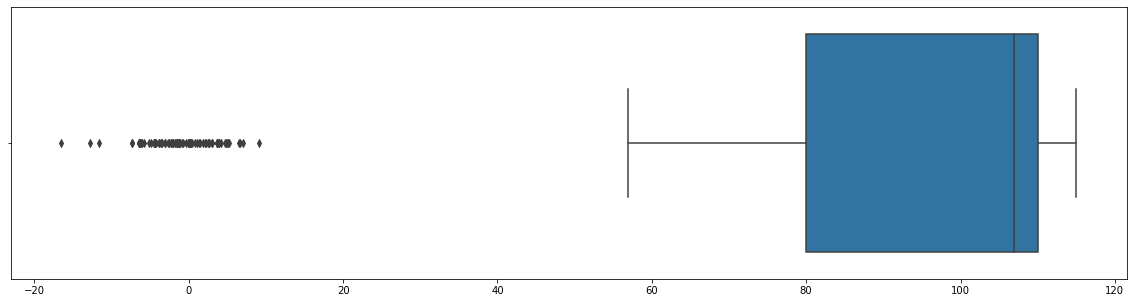

In [2]:
from sklearn.covariance import EllipticEnvelope
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Aplicar el método de Elliptic Envelope fijando una semilla en 42
outlier_method = EllipticEnvelope(random_state=42).fit(X)
scores_pred = outlier_method.decision_function(X)

# Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
IQR = Q3 - Q1

# Utilizamos el valor de 3.0 para determinar los valores outliers extremos
li = Q1 - 3.0*IQR
ls = Q3 + 3.0*IQR

pos_i = np.where(scores_pred < li)
pos_s = np.where(scores_pred > ls)

# Plotear el diagrama obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
fig, ax = plt.subplots(figsize=[20, 5])
sns.boxplot(x=scores_pred)
plt.show()

# Eliminar las instancias que contengan valores outliers extremos
indices_2 = []
if pos_i[0] is not None: 
    for data in pos_i[0]:
        indices_2.append(data)

if pos_s[0] is not None:
    for data in pos_s[0]:
        indices_2.append(data)

# NOTA: ya que en el apartado anterior los outputs se llaman X e y
# para este problema los outputs se llamaran X_2 e y_2
# para poder diferenciar entre un output y otro
X_2 = np.delete(X, tuple(indices_2), axis=0) 
y_2 = np.delete(y, tuple(indices_2), axis=0)

### Ejercicio 2 (1.5 puntos)
Utilizar el conjunto de datos "dataset_2.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 2.a) Partición de datos externa (0.5 puntos)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42). 

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

data_2 = np.load('data' + os.sep + 'dataset_2.npy')

# Atributos
X_3 = data_2[:, :-1].copy()
# Clase
y_3 = data_2[:, -1].copy()

# Test: particion externa hold-out split 80-20% 
X_training, X_test, y_training, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

#### 2.b) Selección de atributos sobre el conjunto de entrenamiento (0.5 puntos)
Aplicar el método de VarianceThreshold con un umbral de 0.2 en el conjunto de entrenamiento

In [4]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

th = 0.2
sel = VarianceThreshold(th)
threshold_fit = sel.fit(X_training)
X_training_new = threshold_fit.transform(X_training)

#### 2.c) Estandarización de los datos de entrenamiento (0.5 puntos)
Utilizar el método StandardScaler

In [5]:
from sklearn import preprocessing
import numpy as np

standardizer = preprocessing.StandardScaler()
standardizer_fit = standardizer.fit(X_training_new)
X_training_std = standardizer_fit.transform(X_training_new)

### Ejercicio 3 (2 puntos)
Se requieren los resultados del ejercicio anterior

#### 3.a) Comparación de modelos de clasifición mediante validación cruzada (0.5 puntos)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión logística, Árboles de decisión y Support vector machine. (Fijar en todos una semilla en 42). La comparación debe realizarse en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [6]:
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import preprocessing, svm

# Calculo de las metricas de evaluacion.
def evaluar(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

# Metricas de evaluacion
metricas = {
    'ACC':    metrics.accuracy_score,
    'PREC':   lambda y_true, y_pred: metrics.precision_score(y_true, y_pred, average='micro'),
    'RECALL': lambda y_true, y_pred: metrics.recall_score(y_true, y_pred, average='micro'),
    'F1':     lambda y_true, y_pred: metrics.f1_score(y_true, y_pred, average='micro')
}

# Construcción del algoritmo de aprendizaje.
seed = 42
algoritmos = {
    'LR': LogisticRegression(penalty='l2', solver='saga', max_iter=1000, random_state=seed, multi_class='ovr'),
    'Tree': tree.DecisionTreeClassifier(random_state=seed),
    'SVM': svm.SVC(C=25, random_state=seed, probability=True)
}

evaluacion = None
evaluacion_metricas = dict()
for nombre, alg in algoritmos.items():
    # Realizamos validación cruzada con bolsas de tamaño = 5
    evaluacion = cross_val_score(alg, X_training_std, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))
    # Realizamos la predicción con validación cruzada con bolsas de tamaño = 5
    y_cross_pred = cross_val_predict(alg, X_training_std, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))
    # Para cada algoritmo evaluamos con las diferentes metricas los resultados obtenidos
    evaluacion_metricas[nombre] = evaluar(y_training, y_cross_pred, metricas)
    print(nombre + " Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (evaluacion.mean(), evaluacion.std()))

LR Accuracy (media +/- desv.): 0.6638 +/- 0.0608
Tree Accuracy (media +/- desv.): 0.9771 +/- 0.0235
SVM Accuracy (media +/- desv.): 0.8166 +/- 0.0382


#### 3.b) Evaluación de los modelos sobre el conjunto de test (1.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento y evaluar su rendimiento sobre el conjunto de test.
- Mostrar en una figura la comparación de las curvas ROC obtenidas para cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LR, Tree y SVM 

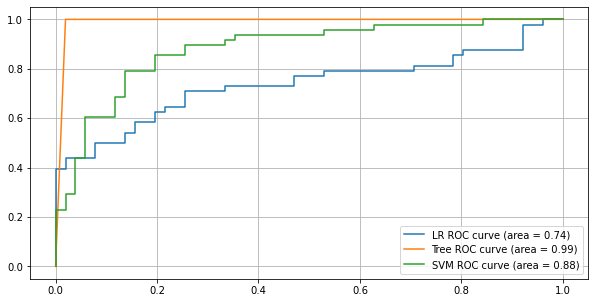

Resultados obtenidos de las metricas de evaluacion para cada modelo: 


,LR,Tree,SVM
ACC,0.664122,0.977099,0.816794
PREC,0.664122,0.977099,0.816794
RECALL,0.664122,0.977099,0.816794
F1,0.664122,0.977099,0.816794
AUC,0.735703,0.990196,0.880310


In [7]:
import pandas as pd

y_pred = dict()
fpr = [] 
tpr = []
auc = []
modelos = []

# Aplicamos la selección de atributos sobre el conjunto de datos nuevo o Test con el threshold de los datos Training
X_test_new = threshold_fit.transform(X_test)
# Aplicamos la estandarización sobre el conjunto de datos nuevo o Test con el estandarizador de los datos Training
X_test_std = standardizer_fit.transform(X_test_new)

# Iteramos como tantos algoritmos haya. En este caso LR, Tree y SVM
for nombre, alg in algoritmos.items():
    # Entrenamos el modelo con los datos de entrenamiento
    model = alg.fit(X_training_std, y_training)    
    # Realizamos la predicción del valor esperado Y con los datos nuevos
    y_pred[nombre] = model.predict(X_test_std)
    y_proba_test = model.predict_proba(X_test_std)
    # Obtenemos las curvas ROC para cada Algoritmo
    auc.append([nombre, metrics.roc_auc_score(y_test, y_proba_test[:, 1])])
    fpr_temp, tpr_temp, th_temp = metrics.roc_curve(y_test, y_proba_test[:, 1])
    fpr.append(fpr_temp)
    tpr.append(tpr_temp)


for nombres in auc:
    evaluacion_metricas[nombres[0]]['AUC'] = nombres[1]

    
figs, ax = plt.subplots(figsize=(10, 5))
plt.plot(fpr[0], tpr[0], label=auc[0][0]+' ROC curve (area = %0.2f)' % auc[0][1])
plt.plot(fpr[1], tpr[1], label=auc[1][0]+' ROC curve (area = %0.2f)' % auc[1][1])
plt.plot(fpr[2], tpr[2], label=auc[2][0]+' ROC curve (area = %0.2f)' % auc[2][1])
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


print(f'Resultados obtenidos de las metricas de evaluacion para cada modelo: ')
heading_properties = [('font-size', '18px')]

# Para desplegar las metricas de cada algoritmo las metemos en un dataframe de pandas
# donde las columnas serán el nombre de los algoritmos y los renglones el nombre de la metrica
cell_properties = [('font-size', '16px')]
dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]
df = pd.DataFrame(data=evaluacion_metricas)
df = df.style.set_table_styles(dfstyle)

display(df)

### Ejercicio 4 (2 puntos)
Utilizar el conjunto de datos "fish_dataset" para resolver el ejercicio

#### 4.a) Procesado de imagen previo a la extracción de características (1 punto)
Crear una función llamada "cropping_function" donde: 
- Los inputs sean la imagen RGB de un pez y su máscara correspondiente.
- El output sea el crop de la bounding box de la imagen original orientada en el eje horizontal.

Para ello, se pide:
- Calcular la orientación del objeto a caracterizar.
- Hacer una conversión siguiendo la siguiente fórmula:
 * angle = (orientation*90)/(math.pi/2), utiliza "import math"
   -  Si 'angle' es mayor que 0, la orientación será igual a 90-angle
   -  Si no, la orientación será igual a -(90+angle)
- Aplicar una transformación geométrica de rotación para orientar horizontalmente el objeto de interés.
- Hacer un crop de la boundingbox de la imagen original RGB, que será el output de la función

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage.measure import regionprops
from skimage.measure import label
from skimage import io, color

''' Funcion para obtener las propiedades de cada objeto '''
def get_properties(lab):
    objeto = lab == 1
    objeto = objeto.astype('uint8')
    # Propiedades de la region
    prop = regionprops(objeto)
    
    return prop

''' Funcion para obtener el ángulo correspondiente de la imagen '''
def get_angle(orientation):
    # Calculo del angulo
    angle = (orientation*90)/(math.pi/2)
    # Si 'angle' es mayor que 0, la orientación será igual a 90-angle
    # Si no, la orientación será igual a -(90+angle)
    if angle > 0:
        orientation = 90 - angle
    else:
        orientation = -1 * (90 + angle)
    
    return orientation
    
''' Funcion para realizar el crop de la imagen original y obtener una nueva imagen'''
def cropping_function(img, mask):
    # Transformamos la imagen de 3D a 2D
    mask = color.rgb2gray(mask)
    
    # Etiquetamos la mascara original     
    lab, num = label(mask, return_num=True)
    
    # Obtener las propiedades de la mascara original     
    properties = get_properties(lab)
    
    # Calculo de la orientacion
    orientation = properties[0].orientation
    
    # Obtenemos el angulo final necesario para rotar horizontalmente la imagen
    final_angle = get_angle(orientation)
    
    # Rotacion geometrica de la imagen con respecto al angulo final   
    rows, cols, ch = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), angle=final_angle, scale=1)
    new_img = cv2.warpAffine(img, M, (cols,rows))
    new_mask = cv2.warpAffine(mask, M, (cols,rows))

    # Etiquetamos la imagen final     
    lab_final, num_final = label(new_mask, return_num=True)
    
    # Obtenemos las propiedades de la imagen final y hacemos el crop     
    properties = get_properties(lab_final)
    bbox = properties[0].bbox
    start_point = (bbox[1], bbox[0])
    end_point = (bbox[3], bbox[2])
    window = cv2.rectangle(new_img.copy(), start_point, end_point, (255, 0, 0), 5)
    
    final_image = new_img[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    
    return final_image

#### 4.b) Extracción de características de textura basadas en el descriptor Local Binary Pattern (1 punto)
Crear un bucle for en el que:
 - Se lean las imágenes RGB y sus máscaras
 - Se extraiga el crop de la imagen RGB horizontal llamando a la función creada en el apartado anterior
 - Se obtenga la imagen LBP
 - Se muestre un subplot con el crop de la imagen RGB horizontal y su imagen LBP
 - Se calcule el histograma relativo a las características LBP. 

Plotear en una figura los 3 histogramas LBP obtenidos para analizar visualmente las diferencias en función del tipo de pez.

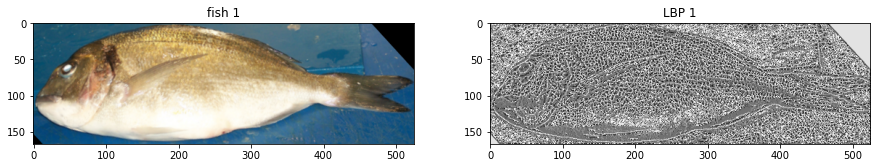

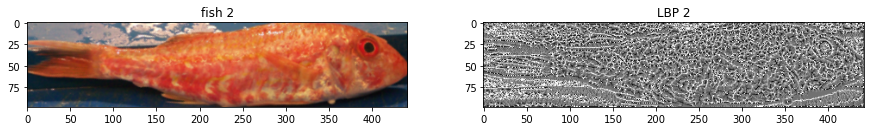

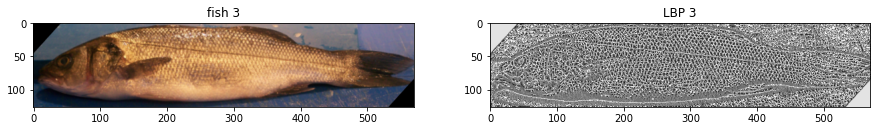

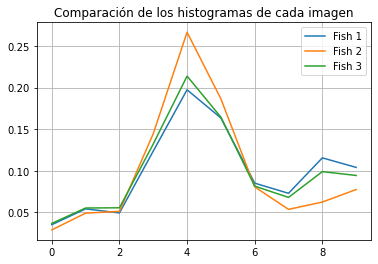

In [6]:
from skimage.feature import local_binary_pattern

data_images = ['00001.png', '00002.png', '00003.png']
histogramas = []

for i in range(len(data_images)):
    # Leemos la imagen RGB
    img = cv2.imread('data' + os.sep + 'fish_dataset' + os.sep + 'images' + os.sep + data_images[i])
    # Leemos la mascara correspondiente de la imagen
    mask = cv2.imread('data' + os.sep + 'fish_dataset' + os.sep + 'masks' + os.sep + data_images[i])
    
    # Convertimos la imagen del canal original a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Llamamos a la funcion cropping_function para obtener el crop del objeto deseado
    new_image = cropping_function(img, mask)
    
    # Definimos los parámetros iniciales
    R = 1 # Radio
    P = 8*R # Número de píxeles vecinos
    epsilon = 1e-7 # Para normalizar el histograma

    # Extraemos la imagen LBP
    img_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    lbp_image = local_binary_pattern(img_gray, P, R, method='uniform')
    
    # Visualizamos crop de la imagen y LBP
    figs, ax = plt.subplots(1,2, figsize=(15, 10))
    ax[0].imshow(new_image, cmap='gray'), ax[0].set_title('fish ' + str(i+1))
    ax[1].imshow(lbp_image, cmap='gray'), ax[1].set_title('LBP ' + str(i+1))
    plt.show()

    # Calculamos el histograma
    lbp_image = np.uint8(lbp_image)
    hist = cv2.calcHist([lbp_image.ravel()], [0], None, [P+2], [0, P+2])

    # Normalizamos el histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + epsilon)
    
    # Metemos cada histograma en una lista para visualizarlos todos en uno solo
    # y asi comparar los resultados obtenidos
    histogramas.append(hist)
    

for histograma in histogramas:
    plt.plot(histograma)

plt.grid(True)
plt.legend(["Fish 1", "Fish 2", "Fish 3"])
plt.title('Comparación de los histogramas de cada imagen')
plt.show()

### Ejercicio 5 (2.5 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE aplicando los regresores OLS y KNN en al menos tres datasets de regresión (a elegir los que se deseen). Se debe llevar a cabo una partición externa de tipo hold-out y una validación cruzada interna con K=10 bolsas.

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from math import sqrt
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore")


'''Imputacion de valores ausentes y etiquetado de columnas categoricas'''
def transform_categories(data):
    categorias = []

    # Si la instancia tiene mas de un valor ausente, la eliminamos
    for i, row in data.iterrows():
        if row.isnull().sum() > 1:
            data = data.drop(i)
    
    # Imputer para variable tipo discreta
    imputer_1 = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
    # Imputer para variable tipo continua
    imputer_2 = SimpleImputer(missing_values=np.NaN, strategy='mean')
    
    # Iteramos de la columna 0 hasta la ultima para imputar valores
    index = 1
    for column in data.columns:

        if index == len(data.columns):
            break
        
        # Si es una columna de tipo categoria, metemos la columna a una lista
        # Por ahora solo queremos imputar valores numericos
        if data[column].dtype == object:
            categorias.append(column)
        
        # Imputar valores nan que pertenecen a un atributo del tipo variable discreta     
        elif data[column].dtype == 'int64':
            data.column = imputer_1.fit_transform(data[column].values.reshape(-1, 1))[:,0]

        # Imputar valores nan que pertenecen a un atributo del tipo variable continua      
        else:
            data[column] = imputer_2.fit_transform(data[column].values.reshape(-1, 1))[:,0]
    
        index += 1
    
    # Etiquetamos columnas que sean del tipo categoria
    for categoria in categorias:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(data[categoria])
        data[categoria] = encoder.transform(data[categoria])
    
    return data


'''Eliminacion de valores outliers en el dataset'''
def delete_outliers(X, y):
    # Aplicar el método de Elliptic Envelope fijando una semilla en 42
    metodo_outlier = EllipticEnvelope(random_state=42).fit(X)
    prediccion_valores = metodo_outlier.decision_function(X)

    # Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
    Q1 = stats.scoreatpercentile(prediccion_valores, 25)
    Q3 = stats.scoreatpercentile(prediccion_valores, 75)
    IQR = Q3 - Q1

    li = Q1 - 3.0*IQR
    ls = Q3 + 3.0*IQR

    pos_i = np.where(prediccion_valores < li)
    pos_s = np.where(prediccion_valores > ls)

    # Eliminar las instancias que contengan valores outliers extremos
    indices_2 = []
    if pos_i[0] is not None: 
        for data in pos_i[0]:
            indices_2.append(data)

    if pos_s[0] is not None:
        for data in pos_s[0]:
            indices_2.append(data)

    X_2 = np.delete(X, tuple(indices_2), axis=0) 
    y_2 = np.delete(y, tuple(indices_2), axis=0)
    
    return X_2, y_2
    

'''Calculo de las metricas de evaluacion'''
def get_evaluation(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

'''Funcion auxiliar para graficar las predicciones obtenidas por cross validation y mediante el entrenamiento del modelo'''
def get_graphs(y_true_cross, y_pred_cross, y_true, y_pred, metricas_1, metricas_2, algoritmo):  
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Graficamos las predicciones obtenidas mediante cross validation
    ax[0].scatter(y_true_cross, y_pred_cross, edgecolors=(0, 0, 0))
    ax[0].plot([y_true_cross.min(), y_true_cross.max()], [y_true_cross.min(), y_true_cross.max()], 'k--', lw=4)
    ax[0].set_xlabel('Valor real de la clase')
    ax[0].set_ylabel('Validacion cruzada de la clase')
    ax[0].set_title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f " % (algoritmo, metricas_1['MAE'], metricas_1['RMSE'], metricas_1['MAPE']))
    
    # Graficamos las predicciones obtenidas mediante el entrenamiento del modelo
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].set_xlabel('Valor real de la clase')
    ax[1].set_ylabel('Predicción')
    ax[1].set_title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f " % (algoritmo, metricas_2['MAE'], metricas_2['RMSE'], metricas_2['MAPE']))

    plt.show()

# Obtenemos datasets tipo dataframe y los guardamos en una variable

# Dataset que contiene estadísticas sobre distintas universidades. El objetivo es el de predecir un ranking en el que dependiendo
# de los diferentes parametros, una persona pueda determinar en que universidad tiene la mayor posbilidad de entrar
data_1 = pd.read_csv('https://raw.githubusercontent.com/MauGutierrez/Master-AI/main/Aprendizaje%20Supervisado/Prueba%20Final/data/admission.csv')

# Dataset que contiene estadísticas sobre concreto. El objetivo es el de predecir que tan resistente será el material
data_2 = pd.read_csv('https://raw.githubusercontent.com/MauGutierrez/Master-AI/main/Aprendizaje%20Supervisado/Prueba%20Final/data/concrete.csv')

# Dataset que contiene estadísticas sobre diferentes modelos de carros en Canada. 
# El objetivo es el de predecir cuales serán las emisiones de CO2 dependiendo del carro.
data_3 = pd.read_csv('https://raw.githubusercontent.com/MauGutierrez/Master-AI/main/Aprendizaje%20Supervisado/Prueba%20Final/data/CO2_emissions_Canada.csv')


# Metemos a un array los datasets
datasets = []
datasets.append(data_1)
datasets.append(data_2)
datasets.append(data_3)

# Nombre de los datasets que utilizaremos
datasets_names = ['admission', 'concrete', 'CO2 emissions Canada']

# Algoritmos que utilizaremos para las predicciones. Seran KNN y OLS
algoritmos = {
    'KNN': KNeighborsRegressor(n_neighbors=8),
    'OLS': LinearRegression()
}

# Utilizaremos las metricas MAE, RMSE y MAPE
metricas = {
    'MAE': metrics.mean_absolute_error,
    'RMSE': lambda y, y_pred: sqrt(metrics.mean_squared_error(y, y_pred)),
    'MAPE': lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100,
}

# Iteramos como tantos datasets haya
index = 0
for data in datasets:
    # Imputamos valores en el dataset
    # Si la instancia tiene mas de un valor ausente la eliminamos
    # de otra manera, si la columna es del tipo variable continua la imputamos con la media de la columna
    # y si la columna es del tipo variable discreta la imputamos con el promedio de la columna
    # De igual manera etiquetamos variables categoricas (no numericas)
    data = transform_categories(data)
    
    # Transformamos dataframe a numpy
    data = np.array(data)
    
    # Separamos atributos de clase     
    X = data[:, :-1].copy()
    y = data[:, -1].copy()
    
    # Eliminamos Outliers     
    X_new, y_new = delete_outliers(X, y)


    # Test: particion externa hold-out split 80-20% 
    X_training, X_test, y_training, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

    # Eliminacion de valores que no tienen varianza
    threshold_object = VarianceThreshold(.2)
    threshold_fit_2 = threshold_object.fit(X_training)
    X_training_new = threshold_fit_2.transform(X_training)

    # Estandarizar valores
    standardizer_2 = preprocessing.StandardScaler()
    standardizer_fit_2 = standardizer_2.fit(X_training_new)
    X_training_std = standardizer_fit_2.transform(X_training_new)
    
    # Para cada dataset, iteramos como tantos algoritmos haya (KNN y OLS)
    print(f'--------- Dataset: {datasets_names[index]} ---------')
    for nombre, alg in algoritmos.items():
        # Realizamos la validacion cruzada con bolsas de n = 10
        y_pred = cross_val_predict(alg, X_training_std, y_training, cv=KFold(n_splits=10, random_state=42, shuffle=True))
        # Obtenemos metricas de evaluacion de la validacion cruzada
        results_cross = get_evaluation(y_training, y_pred, metricas)
        
        # Entrenamiento de modelo para predecir valores 
        model = alg.fit(X_training_std, y_training)
        
        # Aplicamos el VarianceThreshold y el estandarizador sobre los datos nuevos (test)
        X_test_new_2 = threshold_fit_2.transform(X_test)
        X_test_std_2 = standardizer_fit_2.transform(X_test_new_2)
        
        # Prediccion de valores con el modelo previamente entrenado
        y_pred_final = model.predict(X_test_std_2)
        
        # Obtenemos los resultados de las metricas de evaluacion para el modelo entrenado
        results_pred = get_evaluation(y_test, y_pred_final, metricas)
        # Graficamos los resultados obtenidosde Cross Validation vs Modelo entrenado
        get_graphs(y_training, y_pred, y_test, y_pred_final, results_cross, results_pred, nombre)
    
    index += 1

Chance of Admit 
--------- Dataset: admission ---------


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').